<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/Theano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Theano**

In [1]:
# 딥러닝이 많은 주목을 받고 지금처럼 비약적으로 성능을 높일 수 있었던 큰 요인으로, 다양한 딥러닝 도구가 공개되어 있다는 것을 들 수 있다.
# ImageNet이나 Places 같은 대규모 데이터 집합과 함께 다양한 학습/테스트 환경이 무료로 제공되어 연구를 시작하기 위한 장벽이 낮아졌으며,
# 또한 그 성과를 공개하기 위한 토양이 될 환경도 마련되어 있다.

In [2]:
# Theano
# 공개연도: 2010
# 사용하는 언어: 파이썬
# 개발 주체: 몬트리얼 대학교

# Tehano: 수치 계산을 위한 도구이며, Theano를 베이스로 하는 딥러닝 소스코드가 공개되어 있다.

# 특징
# 1) 변수나 행렬, 식에 대한 계산 과정을 수식과 같은 방식으로 나타낼 수 있다.
# 2) 경사 계산을 해석적으로 수행할 수 있다.
# 3) 수행 속도가 빠르다.
# 4) GPU 연산을 지원한다.

# Theano는 계산 과정을 수식 자체로 나타낼 수 있다.

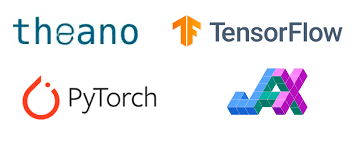

**Theano의 설치**

In [4]:
!sudo apt-get install python-numpy python-scipy python-dev
!python-pip python-nose g++ libopenblas-dev git
!sudo pip install Theano

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  python2-dev python2 python-dev-is-python3

Package python-scipy is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Unable to locate package python-numpy
E: Package 'python-scipy' has no installation candidate
E: Package 'python-dev' has no installation candidate
/bin/bash: line 1: python-pip: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=827aaed3ae47a84858304c2b5432754fd743c2f4cc837

**Github로부터 설치**

In [5]:
!git clone git://github.com/Theano/Theano.git
!cd Theano
!sudo python setup.py develop

Cloning into 'Theano'...
fatal: unable to connect to github.com:
github.com[0: 140.82.114.3]: errno=Connection timed out

/bin/bash: line 1: cd: Theano: No such file or directory
python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


**Github에서 설치(업데이트)**

In [ ]:
from typing import TYPE_CHECKING
# Theano가 이미 설치되어 있는 상태에서 업데이트를 하려는 경우에는 다음과 같은 명령을 사용한다.
!sudo pip install--upgrade --no-deps theano
# 또는
!sudo pip install--upgrade theano

#github을 이용하는 경우에는
!cd Theano
!git pull

**CUDA Toolkit 설치**

In [6]:
# Thean를 CUDA를 사용하는 GPU로 실행하기 위해서는 별도의 GPU 드라이버와 CUDA Toolkit이 필요하다.
# Ubuntu에서는 다음 명령으로 설치할 수 있지만, 최신 버전을 사용하려면 NVIDIA 홈페이지에서 직접 다운로드한 뒤 설치해야 한다.
!sudo apt-get install nvidia-current
!sudo apt-get install nvidia-cuda-toolkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package nvidia-current is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'nvidia-current' has no installation candidate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libaccinj64-11.5 libatk-wrapper-java
  libatk-wrapper-java-jni libbabeltrace1 libcub-dev libcublas11 libcublaslt11
  libcudart11.0 libcufft10 libcufftw10 libcuinj64-11.5 libcupti-dev
  libcupti-doc libcupti11.5 libcurand10 libcusolver11 libcusolvermg11
  libcusparse11 libdebuginfod-common libdebuginfod1 libegl-dev libfontenc1
  libgail-common libgail18 libgl-dev libgl1-mesa-dev libgles-dev libgles1
  libglvnd-core-dev libglvnd-dev libglx-dev libgtk2.0-0 libgtk2.0-bin

In [ ]:
# Theano를 GPU로 실행하려면 홈 디렉터리에 .theanorc라는 파일을 작성해야 한다.
# .theanorc 파일에는 다음 내용을 추가해야 한다.
# .theanorc 파일 내용

# [global]
floatX=float32 # float: 32bit
device=gpu # gpu를 사용하라는 의미.
# device=cpu: CPU를 사용하게 된다.

#[nvcc]
fastmath=True

**Theano를 이용한 기본적인 구현 방법**

In [10]:
!pip install Theano

In [ ]:
# Theano는 변수(스칼라, 벡터, 행렬, 텐서)를 심볼이라고 부른다.
import theano.tensor as T
x=T.iscalar('x')
x=T.scalar('x', dtype='int32')
v=T.fvector('v')
m=T.dmatrix('m')
t=T.dtensor3('t')

**수식 정의하기**

In [ ]:
y=2*x
z=x**2+y**2

**함수 생성하기**

In [ ]:
from theano import function
# Theano의 함수에 의해 수식이 컴파일 된다.

f=function(inputs=[x], outputs=z)
# inputs: 첫번째 인자는 파있너의 리스트형을 인자로 받고, outputs: 두 번째 인자인 출력 심볼로는 계산할 식을 넘겨준다.
# function의 출력 심볼: z

**함수 실행하기**

In [ ]:
out=f(3)

# 출력: array(45)

# 입력하는 심볼이 꼭 스칼라여야 하는 것은 아니며 벡터를 입력할 수도 있다.
# 이 경우엔 x=T.dvector('x')와 같이 x를 numpy의 배열로서 넘긴다.

**givens의 역할**

In [13]:
# givens: 식 안에 있는 심볼을 다른 심볼이나 값으로 치환하는 역할.
c=T.dscalar()
z=x**2+y**2
ff=theano.function(inputs=[c], outputs=z, givens=[(x,c*10),(y,5)])
ff(2)

# 출력: array(425)

**미분 정의하기**

In [ ]:
gz=T.grad(cost=z, wrt=x)
f=function(inputs=[x], outpus=gz)

# z=x^2+y^2 -> dz/dx=2x

**함수 실행하기**

In [ ]:
a=3
b=f(a)

# 출력: array(6)

# 공유 변수 : shared variable
# 함수의 입출력은 파이썬의 numpy 배열로, 함수를 이용할 때 메모리에 복사된다.
# 공유 변수를 사용하면 메모리에 이를 복사하지 않고도 Theano 코드에서 사용할 수 있다.
# 학습 표본도 공유 변수로 해 두면 업데이트 때마다 학습 표본을 메모리에 로드하지 않아도 된다.

**공유 변수 생성하기**

In [ ]:
from theano import shared
m=shared(np.zeros((3,3)), name='m')
n=shared(np.array([1.5, 2.5, 3.5]), name='n')

# 심볼 m,n은 각각 행렬과 배열이지만, 이들을 shared의 인자로 넘기면 그 내용을 theano의 수식에서만 읽을 수 있게 된다.
# 만약 공유 변수의 내용을 확인하려면 get_value()함수를 이용한다.

**공유 변수 내용 확인하기**

In [ ]:
m.get_value()
n.get_value()

**공유 변수 참조하기**

In [ ]:
x=n*3
f=function(inputs=[], outputs=x)

f() array([4.5, 7.5, 10.5])
# 공유 변수의 내용을 변경할 때에는 function의 3번째 인자로 updates를 넘긴다.
# 이 인자는 파이썬의 딕셔너리형이다. 이 인자로 생성된 함수가 실행될 때는 딕셔너리의 키가 되는 공유 변수가 치환된다.

**공유 변수의 내용 바꾸기**

In [ ]:
n=shared(np.array([1.5, 2.5, 3.5]), name='n')
f=function(inputs=[], outputs=[], updates={n:n*2})
n.get_value()
# array([1.5, 2.5, 3.5])

f()
n.get_value()
# 출력: array([3., 5., 7.]) => n:n*2에 의해서.

f()
n.get_value()
# 출력: array([6., 10., 14.])


**Theano를 이용한 경사 하강법**

In [ ]:
x=T.dvector('x')
t=theano.shared(0.)
y=T.sum((x-t)**2) # 오차 함수 정의

gt=T.grad(y,t) # 오차함수 미분
d2=theano.function(inputs=[x], outputs=y, updates={t:t-0.05*gt})
# function(updates={t:t-0.05*gt}) : t의 업데이트 식을 넘긴다.

In [ ]:
d2([1,2,3,4,5])
# 출력: array(55.0)

t.get_value()
# 출력: 1.5

d2([1,2,3,4,5])
# 출력: array(21.25)

t.get_value()
# 출력: 2.25

d2([1,2,3,4,5])
# 출력: array(12.8125)

t.get_value()
# 출력: 2.625